This project is carried out in following stages:
    1. Data Cleaning--since lot of NaN values
    2. EDA -Exploratory Data Analysis-- done while working in ML
    3. Text Preprocessing
            --Vectorization and Stemming (Processing of raw data in NLP)
    4. Model Building
    5. Evaluation of model
    6. Improvements based on evaluation

In [160]:
import numpy as np
import pandas as pd

In [161]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [162]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [163]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
53,ham,Wow. I never realized that you were so embaras...,NaN,NaN,NaN
4786,ham,ÌÏ thk of wat to eat tonight.,NaN,NaN,NaN
4978,ham,Spending new years with my brother and his fam...,NaN,NaN,NaN
3285,ham,Not to worry. I'm sure you'll get it.,NaN,NaN,NaN
461,ham,Great. Never been better. Each day gives even ...,NaN,NaN,NaN


lots of NaN values so must be cleaned

In [164]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


To Check the importance of last three columns to decide where to drop it or not.
Here lots are values are missing so we will drop last 3 columns

In [166]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
#inplace =True tells that it is permanent operation that is done for whole project

In [167]:
df.sample(5)

,v1,v2
1274,ham,Let me know how to contact you. I've you settl...
5259,ham,Can help u swoop by picking u up from wherever...
5247,ham,Gud ni8 dear..slp well..take care..swt dreams....
1117,spam,"449050000301 You have won a å£2,000 price! To ..."
2764,ham,Open rebtel with firefox. When it loads just p...


In [168]:
 #Renaming the columns
 df.rename(columns={'v1':'type','v2':'text'},inplace=True)

In [169]:
df.sample(10)

,type,text
5256,ham,Well she's in for a big surprise!
5169,ham,Now i'm going for lunch.
553,ham,Ok. Every night take a warm bath drink a cup o...
4322,ham,Aight well keep me informed
582,spam,We tried to contact you re your reply to our o...
4036,ham,Dont flatter yourself... Tell that man of mine...
4587,ham,I wanted to wish you a Happy New Year and I wa...
5365,spam,Camera - You are awarded a SiPix Digital Camer...
594,ham,I met you as a stranger and choose you as my f...
2920,ham,"Yo, any way we could pick something up tonight?"


The values of type column---ham and spam --> needs to be converted into number---0/1

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
encoder=LabelEncoder()

In [172]:
df['type']=encoder.fit_transform(df['type'])

In [173]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [174]:
#missing values
df.isnull().sum()

type    0
text    0
dtype: int64

In [175]:
#to check duplicate values
df.duplicated().sum()

403

In the dataframe there are no any null values but DUPLICATE values are availables.
We have to remove the duplicated Values

In [176]:
df=df.drop_duplicates(keep='first')

In [177]:
#now size should be less tha previous 
df.shape

(5169, 2)

Now we are done with basic cleaning part, now we will move to EDA
# 2.EDA --Exploratory Data Analysis

In [178]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [179]:
#to check how many data are spam and how many are ham----value_count--to categorical column
df['type'].value_counts()

0    4516
1     653
Name: type, dtype: int64

here ham--4516 and 1--653

In [180]:
#to represent in better form--piechart
from matplotlib import pyplot as plt

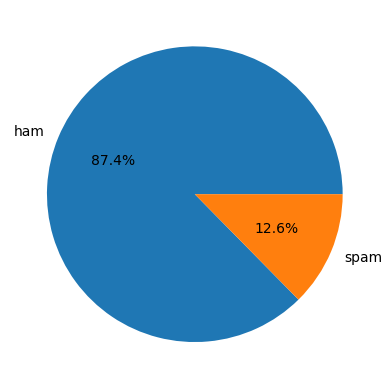

In [181]:
plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct='%0.1f%%')
plt.show()

Here, clearly seen that data is imbalanced,, lots of ham  

# To get deeper understanding for message do analysis for:
## Number of characters,words and sentences in the Email message
### then WE ADD COLUMNS FOR THESE INDIVIDUAL

In [182]:
#for this we use special library called -NLTK(Natural Language Processing Toolkit)
#FAMOUS NLP LIBRARY

In [183]:
import nltk

In [184]:
!pip install nltk

In [185]:
nltk.download('punkt')
#for dependecies of nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [186]:
#to count the number of characters in a message
df['num_characters'] = df['text'].apply(len)

In [187]:
df.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [188]:
#Now to count the number of words in the message, we need to use NLTK and lambda function
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [189]:
#here all the words in the message are breaked words by words and appears as list

#### To count these words add simple len function in above code and store in new columns

In [190]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [191]:
df.head()

,type,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


#### Similarly to count number of sentences in the message, the process is same as word, but replace word with sent

In [192]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [193]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [194]:
df.head()

,type,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [195]:
#to know more info about the values 
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


##### Here, we can see, average characters is 78 , words is 18 and sentence is rougly 2
#####  there is max 910 characters, 220 words  and 38 sentences IN A MESSAGE

## NOW WE ANALYZE THESE INFO BASED ON SPAM AND HAM

#### 1. FOR HAM

In [196]:
df[df['type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### 2.FOR SPAM

In [197]:
df[df['type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### HERE WE CAN ANALYZE FOLLOWING THINGS
#### a. for spam message average characters is 137 
#### b. for ham message average characters is 70
#### b. for spam message max letters are of 224,46 and 9 
#### c. for ham message max letter are of 910,220,37

### SPAM MESSAGE are big interms of CHARACTER, WORDS, SENTENCES

In [198]:
#REPRESENTING IT USING BAR PLOT

In [199]:
import seaborn as sns

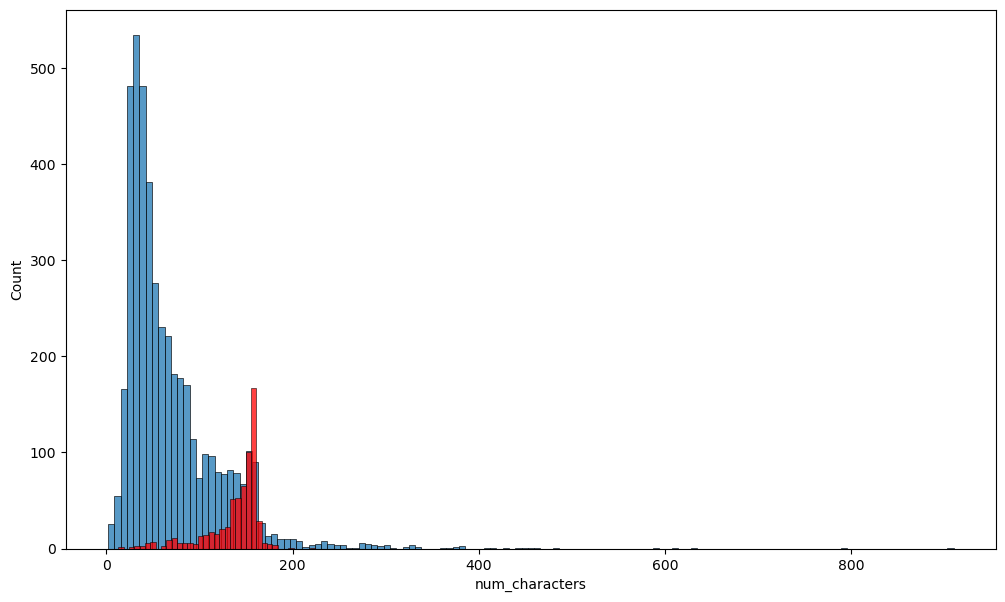

In [200]:
#FOR NUMBER OF CHARACTERS
plt.figure(figsize=(12,7))
sns.histplot(df[df['type']==0]['num_characters'])
sns.histplot(df[df['type']==1]['num_characters'],color='red')
plt.show()

###### Here, we can see HAM message have less characters than that of SPAM messages
count axis gives kati message kati kati ko xa COUNT

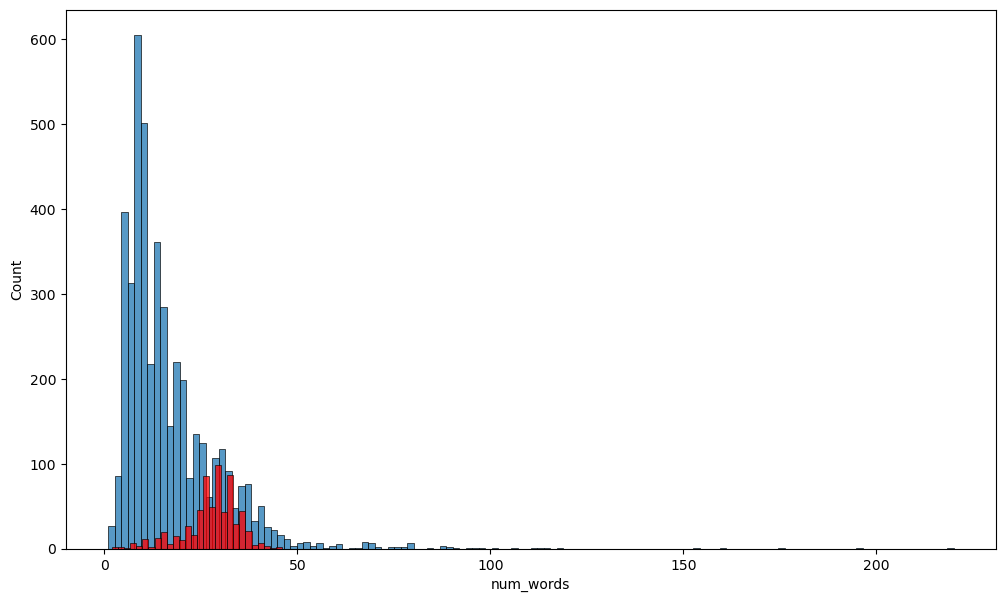

In [201]:
#FOR NUMBER OF WORDS
plt.figure(figsize=(12,7))
sns.histplot(df[df['type']==0]['num_words'])
sns.histplot(df[df['type']==1]['num_words'],color='red')
plt.show()

###### Here, we can see HAM message have less words than that of SPAM messages
count axis gives kati message kati kati ko xa COUNT

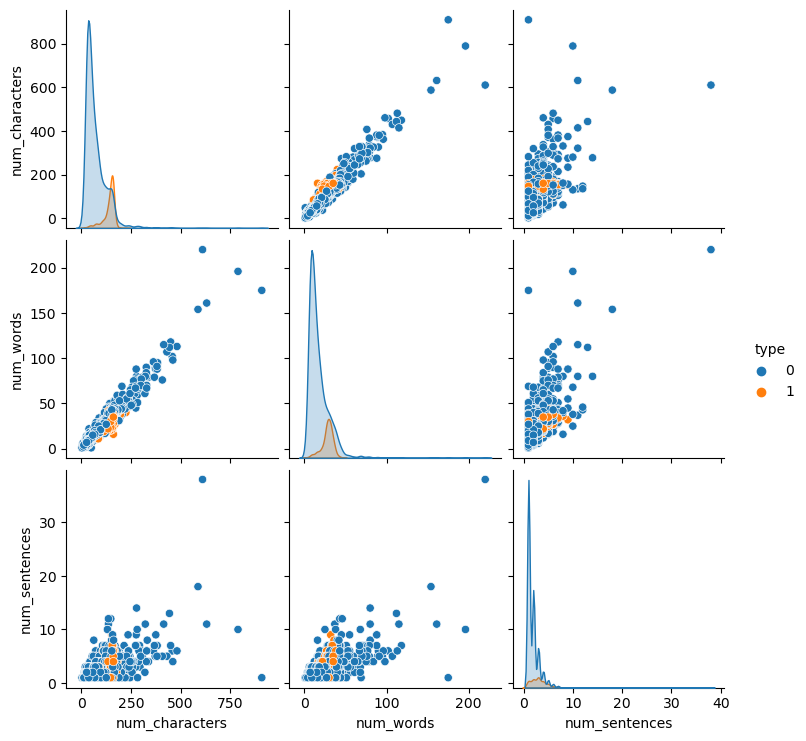

In [204]:
#TO SEE RELATION OF COLUMNS WITH ONE ANOTHER
sns.pairplot(df,hue='type')
plt.show()

###### from above graph we can see that there are OUTLIERS in DATA, Analysis lai effect garxa
###### also, sentence ra char ko simple linear reln xa
###### KHASAI EFFECTICVE KNOWLEGDE XAINA

### CORRELATION 
--- Deduce more knowledge about the relationship
--- We make use knowlegde about Correlation Coefficient
--- Correlation is the interdependence of variable quantities

--- Correlation Coefficient is the statistical measure of strength of linear relationship between two variables.(continuous)
    here the value ranges form -1 to 1, where -1 : perfect negative or inverse correlation,,+1 : positive correlation or direct relationship,,0 : no linear relationship
                        
--- Pearson Coefficient : Represent the relationship between 2 variables that are measured in same interval or ratio scale                       

C:\Users\user\AppData\Local\Temp\ipykernel_16244\2989819515.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True) #exact value dinxu Annotation le


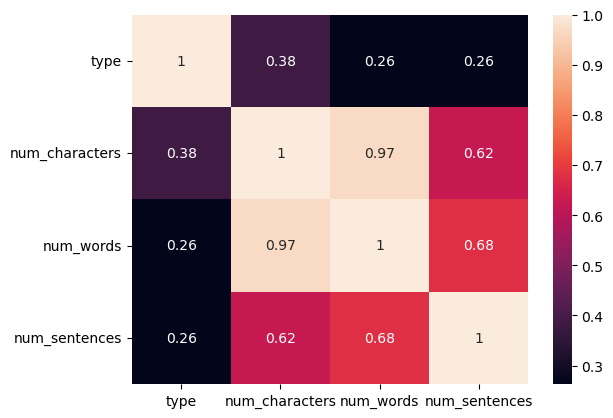

In [205]:
sns.heatmap(df.corr(),annot=True) #exact value dinxu Annotation le
plt.show()

-here we, can see that "type" has most ie. 0.38 correlation with "characters" than others
-this means, if more close to 1, more will be tendency,it more possibility to be "SPAM"

-now looking between the elements, values are high
-if you see, "characters" and  "words" are very high.

-if you want to make model, one column

-we chose "characters" since "characters" have high variance with "type"

In [206]:
#now we need to FIND the mostly repeating top words in SPAM and HAM

# 3.DATA PREPROCESSING : NLP
### STAGES OF Data Processing
a> Lowercase

b> Tokeniztion : breaking of words

c> Removal of Special Characters

d> Removal of Stopwords and Punctuation(stopwords -words used for sentence formation [a,the,of,is] no actual meaning to 
sentence)

e> Stemming or Lemmatization (converting same type of words to single word[dance,dancing,danced=dance])

#### Now, To remove STOPWORDS and Punctuations we need a library

In [207]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [208]:
from nltk.corpus import stopwords
stopwords.words('english')    

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [209]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### To perform stemming and lemmatization, we need to import

In [210]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [211]:
#Creating a single function that performs series of these stages
def transform_text(text):
    text= text.lower() #lowercase
    text= nltk.word_tokenize(text) #tokenization
     
    #for removal of special characters
    y=[] #making y as list, since tokenizer makes out content as list
    for i in text:
        if i.isalnum():
            y.append(i)
            
    #For Removing stopwords and punctuation        
    text = y[:] 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #for Stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    #return y
    return " ".join(y)

In [212]:
transform_text('Hiii how Are yOu dancing and loving eating 10 % ?')#here % wiil be removed

'hiii danc love eat 10'

In [213]:
df['transformed_text'] = df['text'].apply(transform_text) #new column created and stored there

In [214]:
df.head()

,type,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### CREATING WORDCLOUD FOR SPAM AND HAM

In [215]:
!pip install wordcloud

In [216]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

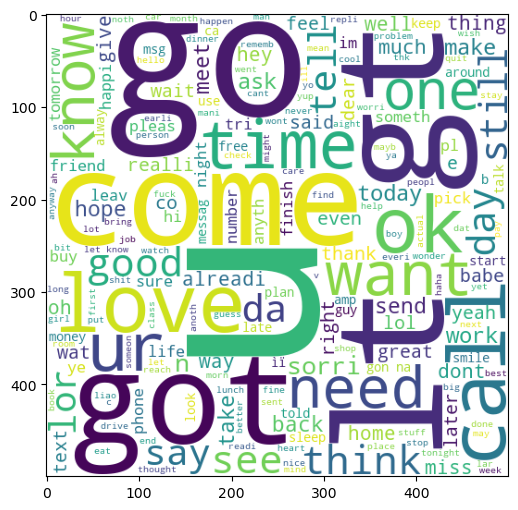

In [217]:
#wordcloud for ham
plt.figure(figsize=(12,6))
ham_wc=wc.generate(df[df['type']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

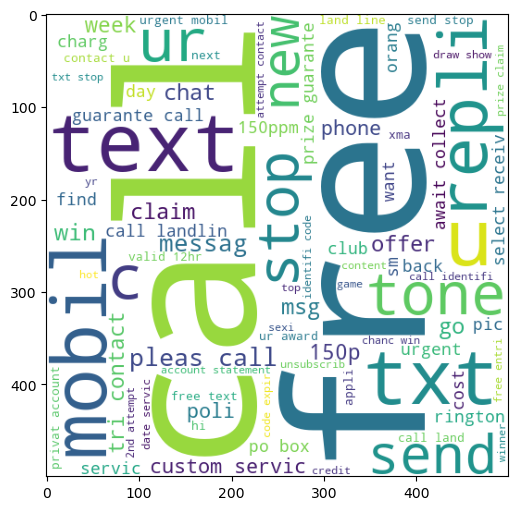

In [218]:
#wordcloud for spam
plt.figure(figsize=(12,6))
spam_wc=wc.generate(df[df['type']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [219]:
#to find top 50 words used in SPAM messages

In [220]:
spam_corpus = [] #list create garyo

for msg in df[df['type']==1]['transformed_text'].tolist():  #sabai msg lai 'msg' name ko list ma halyo
    for word in msg.split():     #tyo msg ko words lai splits garyo ani append garyo main list ma
        spam_corpus.append(word)

In [221]:
len(spam_corpus)

9939

In [222]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [223]:
#now storing these data in data frame 

In [224]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


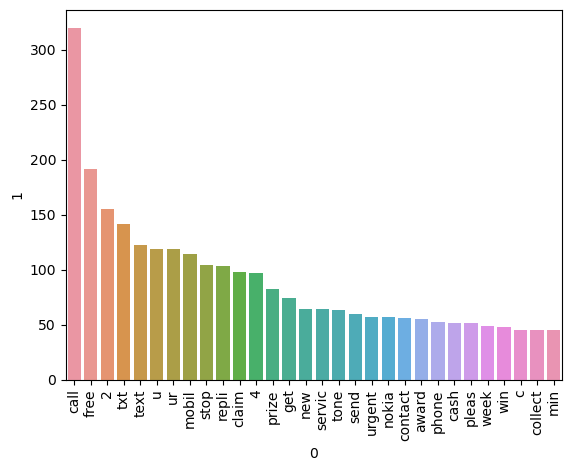

In [225]:
#making barplot of these
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()



In [226]:
#similarly for ham messages
ham_corpus=[]
for msg1 in df[df['type']==0]['transformed_text'].tolist():
    for word in msg1.split():
        ham_corpus.append(word)

In [227]:
len(ham_corpus)

35404

In [228]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


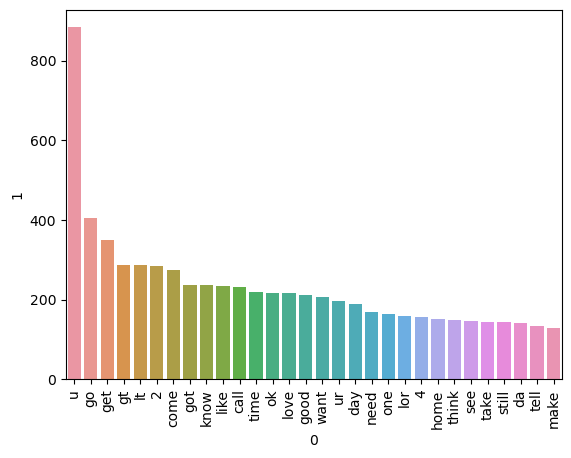

In [229]:
#making barplot of these
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. MODEL BUILDING

### We generally use Naive Bayes Since, it is generally recommended to use NAIVE BAYES on TEXTUAL DATA

In [230]:
#Text Vectorization

In [231]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

#tfidf = TfidfVectorizer() #for the improvement of model,,max_features le top 3000 words matra linxa ,,paila around 6k lai garya thyo
tfidf= TfidfVectorizer(max_features=3000)
# CountVectorizer is done for bag of words

In [232]:
#X= cv.fit_transform(df['transformed_text']).toarray()
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# appending the num_characters col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [233]:
X.shape

(5169, 3000)

In [234]:
Y = df['type'].values

In [235]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [103]:
#here X is the text where as Y is the type

##### Now, Applying Train test split

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

### Now Importing the algorithm

In [238]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [239]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
# since it is high precision model since use of text need of precision_score

In [240]:
#we are importing all these algorithms since we dont know the data distribution

In [241]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [242]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred1))
print("Confusion Matrix") 
print(confusion_matrix(Y_test,Y_pred1))
print("Precision",precision_score(Y_test,Y_pred1))

Accuracy 0.8694390715667312
Confusion Matrix
[[788 108]
 [ 27 111]]
Precision 0.5068493150684932


In [243]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred2))
print("Confusion Matrix") 
print(confusion_matrix(Y_test,Y_pred2))
print("Precision",precision_score(Y_test,Y_pred2))

Accuracy 0.9709864603481625
Confusion Matrix
[[896   0]
 [ 30 108]]
Precision 1.0


In [244]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred3))
print("Confusion Matrix") 
print(confusion_matrix(Y_test,Y_pred3))
print("Precision",precision_score(Y_test,Y_pred3))

Accuracy 0.9835589941972921
Confusion Matrix
[[895   1]
 [ 16 122]]
Precision 0.991869918699187


### Accuracy doesnt matter more as comparison to PRECISION

using the TfidfVectorizer for Text Vectorization, mnb have more precision,, no false positive
,,
So, We will go through mnb

## Now try to check with other CLASSIFICATION models

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  #support vector classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [246]:
!pip install xgboost

In [247]:
from xgboost import XGBClassifier

In [248]:
lrc =LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
knc =KNeighborsClassifier()
rfc =RandomForestClassifier(n_estimators=50,random_state=2)
abc =AdaBoostClassifier(n_estimators=50,random_state=2)
bc  =BaggingClassifier(n_estimators=50,random_state=2)
etc =ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb =XGBClassifier(n_estimators=50,random_state=2)


# N_ESTIMATORS
#specifies the number of base estimators (weak learners or classifiers) 
#n_estimators too high can result in overfitting on the training data, and the performance on unseen data (like the test data) may suffer.

In [249]:
clfs={
    'LR': lrc,
    'SVC' :svc,
    'NB':mnb,
    'DT':dtc,
    'KN':knc,
    'RF':rfc,
    'AdaBoost':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [250]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy= accuracy_score(Y_test,Y_pred)
    precision= precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [251]:
#taking demo
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [252]:
#now creating data frame for all the classifier
accuracy_scores= []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  XGB
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [94]:
performance_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [95]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.959381,1.000000
4,KN,0.900387,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
1,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,XGB,0.972921,0.943548
0,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BC,0.958414,0.862595


## IMPROVEMENT OF MODEL 

1. Change the max_features parameter of Tfidf class--changes made to instance of Tfidf also

In [224]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [225]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
2,NB,0.970986,1.000000
4,KN,0.905222,1.000000
5,RF,0.975822,0.982906
1,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
0,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BC,0.958414,0.868217


In [226]:
#merging the tables with above one for comparison
new_df= performance_df.merge(temp_df,on='Algorithm')

In [227]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.959381,1.000000,0.970986,1.000000
1,KN,0.900387,1.000000,0.905222,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BC,0.958414,0.862595,0.958414,0.868217


In [250]:
new_temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=True)

In [251]:
new_df_scaled = new_df.merge(new_temp_df,on='Algorithm')

In [252]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
1,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [274]:
#scaling improves the accuracy, precision is degrades so,useless(no vast changes)so doesnt integrate the scaling code in the flow
#comment out 

In [275]:
#adding the number of chars or appending to the input and check for precion and accuracy
new_char_temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [276]:
new_char_df = new_df_scaled.merge(new_char_temp_df,on='Algorithm')

In [277]:
new_char_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.973888,0.951220
1,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.885880,0.833333
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,XGB,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230,0.969052,0.941667
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.965184,0.955357
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.951644,0.931373
9,BC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225


In [278]:
#precision and Accuracy jhan ghatyo

### Voting Classifier 
It is used to combine multiple algorithm as a one 

In [290]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [291]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [292]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [293]:
VotingClassifier(estimators=[('svm',SVC(gamma=1.0, kernel='sigmoid',probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',ExtraTreesClassifier(n_estimators=50,random_state=2))],
                                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [294]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9738878143133463
Precision 1.0


In [295]:
# Applying stacking --similar to voting, but weightage can de provided to each using RandomForestClassifier
#in voting samee for all

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [296]:
from sklearn.ensemble import StackingClassifier

In [297]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [299]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9738878143133463
Precision 0.9111111111111111


### Since,PRECISION is down SO don't use this model

## THE FINAL OPTIMAL ALGORITHM IS MULTINOMIAL NAIVE BAYES ALGORITHM

In [253]:
(mnb.fit(X_train,Y_train))

MultinomialNB()

In [261]:
# input_msg = ("Task: Buy or Deposit $10 worth of Crypto Reward: a $30 Spot Trading Fee Rebate Voucher")
# transformed_input_data = transform_text(input_msg)
# vector_input = tfidf.transform([transformed_input_data])
# prediction= mnb.predict(vector_input)[0]
# if (prediction==1):
#     print("Spam Message")
# else:
#     print('Ham Message')

    

Spam Message


In [263]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))